In [2]:
from matplotlib import pyplot as pl
from teamlib import WiskiTools as wt
import numpy as np

In [7]:
# Search for a station, and output station names:
MyList=wt.searchStation('BWC')

http://giws.usask.ca:8080/KiWIS/KiWIS?service=kisters&type=queryServices&request=getStationList&datasource=0&format=ascii
0 	 00 Site Documents
1 	 Annies Well Meteorological
2 	 Brightwater Creek Piezometers
3 	 Cropped NW13 Flux Aux
4 	 Cropped NW13 Flux Calc
5 	 Cropped NW13 Meteorological
6 	 Cropped SE13 Flux Aux
7 	 Cropped SE13 Flux Calc
8 	 Cropped SE13 Meteorological
9 	 ECSoil_NE09
10 	 ECSoil_NE13
11 	 ECSoil_NE23
12 	 ECSoil_NE25
13 	 ECSoil_NE33
14 	 ECSoil_NE36
15 	 ECSoil_NW01
16 	 ECSoil_NW03
17 	 ECSoil_NW06
18 	 ECSoil_NW07
19 	 ECSoil_NW09
20 	 ECSoil_NW13
21 	 ECSoil_NW19
22 	 ECSoil_NW26
23 	 ECSoil_NW29
24 	 ECSoil_SE13
25 	 ECSoil_SE24
26 	 ECSoil_SW03
27 	 ECSoil_SW07
28 	 ECSoil_SW13
29 	 ECSoil_SW26
30 	 ECSoil_SW30
31 	 ECSoil_SW31
32 	 Main  Pasture COSMOS
33 	 Main Pasture Aux
34 	 Main Pasture EnergyBAL
35 	 Main Pasture Flux Aux IRGASON
36 	 Main Pasture Flux Aux KH2O
37 	 Main Pasture Flux Calc IRGASON
38 	 Main Pasture Flux Calc KH2O
39 	 Main Pasture F

In [12]:
# Select one station from the list, by number:
station_name=MyList[47]
print(station_name)

Main Pasture Soil Water Transect 100mSE


In [13]:
# List all time series associated with this station:
MyTS=wt.searchTimeseries('',station_name)

No # 	 Timeseries 	 Parameter
0 	 83383042 	 BatteryVoltage_LoggerSWT2
1 	 83387042 	 PanelTemp_LoggerSWT2
2 	 83390042 	 SoilDielectricConstImagCorr_005cm
3 	 83411042 	 SoilDielectricConstImagCorr_020cm
4 	 83432042 	 SoilDielectricConstImagCorr_050cm
5 	 83453042 	 SoilDielectricConstImagCorr_075cm
6 	 83474042 	 SoilDielectricConstImagCorr_100cm
7 	 83495042 	 SoilDielectricConstImagCorr_130cm
8 	 83516042 	 SoilDielectricConstImagCorr_160cm
9 	 83537042 	 SoilDielectricConstImag_005cm
10 	 83558042 	 SoilDielectricConstImag_020cm
11 	 83579042 	 SoilDielectricConstImag_050cm
12 	 83600042 	 SoilDielectricConstImag_075cm
13 	 83621042 	 SoilDielectricConstImag_100cm
14 	 83642042 	 SoilDielectricConstImag_130cm
15 	 83663042 	 SoilDielectricConstImag_160cm
16 	 83684042 	 SoilDielectricConstRealCorr_005cm
17 	 83705042 	 SoilDielectricConstRealCorr_020cm
18 	 83726042 	 SoilDielectricConstRealCorr_050cm
19 	 83747042 	 SoilDielectricConstRealCorr_075cm
20 	 83768042 	 SoilDielectri

In [14]:
# Select one or more times series, by index
indexes=np.arange(70,77)
print(indexes)

# Select a data range to work with:
Start='2001-08-01 00:00:00'
End='2060-02-08 00:00:00'

# Extract data into a pandas dataframe:
TS_Selection=MyTS[indexes]
df = wt.getTimeseries(TS_Selection,station_name,Start,End)

[70 71 72 73 74 75 76]
2001-08-01 00:00:00
http://giws.usask.ca:8080/KiWIS/KiWIS?service=kisters&type=queryServices&request=getTimeseriesValues&datasource=0&format=ascii&dateformat=yyyy-MM-dd%20HH:mm:ss&timezone=GMT-6&ts_id=55534042&returnfields=Timestamp,Value&from=2001-08-01 00:00:00&to=2060-02-08 00:00:00&
SoilVWC_005cm 85627
http://giws.usask.ca:8080/KiWIS/KiWIS?service=kisters&type=queryServices&request=getTimeseriesValues&datasource=0&format=ascii&dateformat=yyyy-MM-dd%20HH:mm:ss&timezone=GMT-6&ts_id=55555042&returnfields=Timestamp,Value&from=2001-08-01 00:00:00&to=2060-02-08 00:00:00&
SoilVWC_020cm 85627
http://giws.usask.ca:8080/KiWIS/KiWIS?service=kisters&type=queryServices&request=getTimeseriesValues&datasource=0&format=ascii&dateformat=yyyy-MM-dd%20HH:mm:ss&timezone=GMT-6&ts_id=55576042&returnfields=Timestamp,Value&from=2001-08-01 00:00:00&to=2060-02-08 00:00:00&
SoilVWC_050cm 85627
http://giws.usask.ca:8080/KiWIS/KiWIS?service=kisters&type=queryServices&request=getTimeserie

In [18]:
from teamlib import saveload as sl



In [20]:
sl.save(df,'BWC_soil')

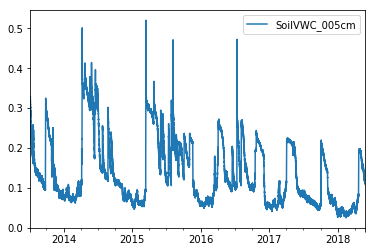

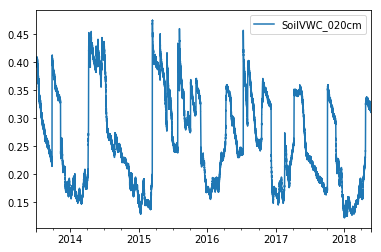

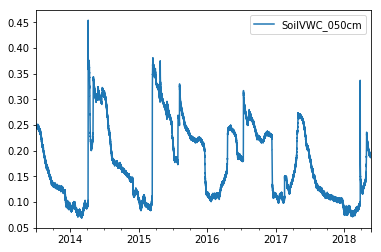

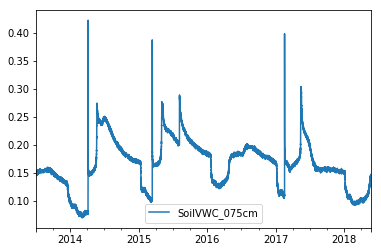

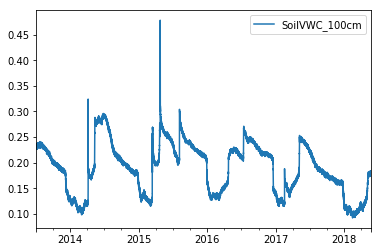

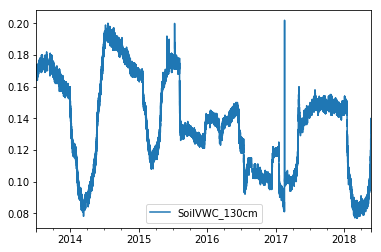

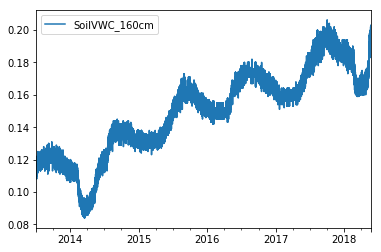

In [15]:
# Plot all the data in your dataframe on individual axes
for i in range(df.columns.size):
    df.plot(y=df.columns[i])
    
pl.show()